# Week -3

## PA_3

In [3]:
import numpy as np
import pandas as pd

In [4]:
df3 = pd.read_csv(r"C:/Users/chand/OB_MLP/Datasets/DataPreprocessingGraded_dataset.csv")
df3.shape

(748, 6)

In [5]:
df3

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO
...,...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,NEGATIVE,NO
744,21.0,2.0,500.0,52.0,NEGATIVE,NO
745,23.0,3.0,750.0,62.0,NEGATIVE,NO
746,39.0,1.0,250.0,39.0,NEGATIVE,NO


In [6]:
df3.Target.value_counts()

Target
NO     570
YES    178
Name: count, dtype: int64

In [7]:
df3.columns[df3.isin(['?']).any()]

Index(['V1', 'V2'], dtype='object')

In [8]:
len(df3.columns[df3.isin(['?']).any()])

2

In [9]:
df3.V2.isin(['?']).sum()

5

In [10]:
from sklearn.impute import KNNImputer
df3['V1'] = pd.to_numeric(df3['V1'].replace('?', np.nan))
imputer = KNNImputer(n_neighbors = 3)
df3['V1'] = imputer.fit_transform(df3[['V1']])
df3['V1'].mean()

9.562584118438762

In [11]:
from sklearn.impute import SimpleImputer
df3['V2'] = pd.to_numeric(df3['V2'].replace('?', np.nan))
imputer = SimpleImputer(strategy='mean')
df3['V2'] = imputer.fit_transform(df3[['V2']])
df3['V2'].mean()

5.464333781965007

In [12]:
variances = df3.var(numeric_only=True)
variances

V1    6.506672e+01
V2    3.341205e+01
V3    2.131094e+06
V4    5.942242e+02
dtype: float64

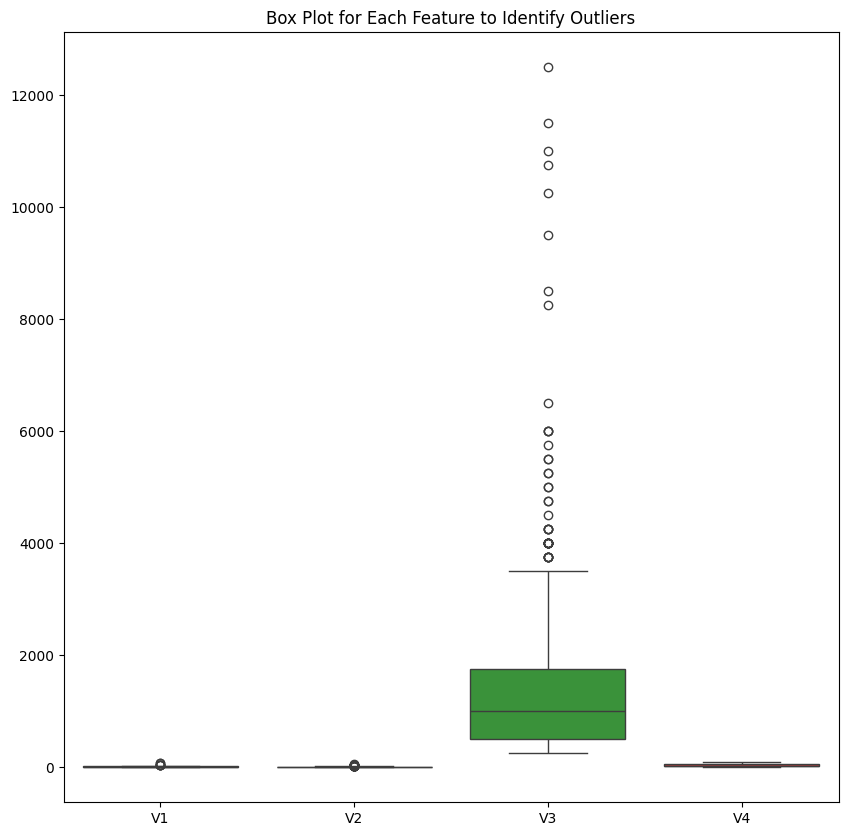

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.boxplot(data=df3)
plt.title('Box Plot for Each Feature to Identify Outliers')
plt.show()

## GA_3

### Piplines,ColumnTransformer

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

In [28]:
df3_1 = pd.read_csv(r"C:/Users/chand/OB_MLP/Datasets/DataPreprocessingGraded_dataset.csv")
df3_1.shape

(748, 6)

In [30]:
df3_1

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO
...,...,...,...,...,...,...
743,23.0,2.0,500.0,38.0,NEGATIVE,NO
744,21.0,2.0,500.0,52.0,NEGATIVE,NO
745,23.0,3.0,750.0,62.0,NEGATIVE,NO
746,39.0,1.0,250.0,39.0,NEGATIVE,NO


In [54]:
df3_1.replace('?', np.nan, inplace=True)

In [56]:
numeric_features = [col for col in df3_1.columns if col.startswith('V') and col != 'V5']
categorical_features = ['V5']

In [58]:
# Pipeline for numeric features: impute missing values and scale
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Impute missing values with mean
    ('scaler', StandardScaler())
])

In [60]:
# Pipeline for categorical feature: ordinal encoding
categorical_pipeline = Pipeline([
    ('encoder', OrdinalEncoder())
])

In [62]:
# Combine pipelines using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_pipeline, numeric_features),
    ('categorical', categorical_pipeline, categorical_features)
])

In [68]:
transformed_data = preprocessor.fit_transform(df3_1)
print(transformed_data)

[[-9.38169390e-01  7.70986653e+00  7.62334626e+00  2.61563344e+00
   0.00000000e+00]
 [-1.18627754e+00  1.30454949e+00  1.28273826e+00 -2.57880900e-01
   0.00000000e+00]
 [ 0.00000000e+00 -1.53758496e-16  1.79684161e+00  2.94705348e-02
   0.00000000e+00]
 ...
 [ 1.66696622e+00 -4.26617275e-01 -4.30939574e-01  1.13782607e+00
   0.00000000e+00]
 [ 3.65183145e+00 -7.72850628e-01 -7.73675141e-01  1.93671355e-01
   0.00000000e+00]
 [ 7.74561598e+00 -7.72850628e-01 -7.73675141e-01  1.54832812e+00
   0.00000000e+00]]


### VarianceThreshold

In [70]:
from sklearn.feature_selection import VarianceThreshold

In [72]:
selector = VarianceThreshold(threshold=0.1)
transformed_data_selected = selector.fit_transform(transformed_data)

In [82]:
transformed_data_selected

array([[-9.38169390e-01,  7.70986653e+00,  7.62334626e+00,
         2.61563344e+00],
       [-1.18627754e+00,  1.30454949e+00,  1.28273826e+00,
        -2.57880900e-01],
       [ 0.00000000e+00, -1.53758496e-16,  1.79684161e+00,
         2.94705348e-02],
       ...,
       [ 1.66696622e+00, -4.26617275e-01, -4.30939574e-01,
         1.13782607e+00],
       [ 3.65183145e+00, -7.72850628e-01, -7.73675141e-01,
         1.93671355e-01],
       [ 7.74561598e+00, -7.72850628e-01, -7.73675141e-01,
         1.54832812e+00]])

### RFE

In [88]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', RFE(estimator=LogisticRegression(), n_features_to_select=2)),
])

In [90]:
target_variable = 'Target'

full_pipeline.fit(df3_1.drop(columns=[target_variable]), df3_1[target_variable])

# Retrieve the selected features from RFE
selected_features_mask = full_pipeline.named_steps['feature_selection'].support_
selected_features = np.array(numeric_features + categorical_features)[selected_features_mask]
print("Selected features by RFE:", selected_features)

Selected features by RFE: ['V1' 'V3']


### SFS

In [92]:
from sklearn.feature_selection import SequentialFeatureSelector
# Full pipeline including feature selection with SFS and model fitting with LogisticRegression
full_pipeline_forward = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SequentialFeatureSelector(estimator=LogisticRegression(), 
                                                     direction='forward', 
                                                     n_features_to_select=2)),
    ('classifier', LogisticRegression())  # Example classifier, adjust as needed
])

full_pipeline_forward.fit(df3_1.drop(columns=[target_variable]), df3_1[target_variable])

# Get selected feature indices
selected_feature_indices_forward = full_pipeline_forward.named_steps['feature_selection'].get_support(indices=True)
selected_features_forward = np.array(numeric_features + categorical_features)[selected_feature_indices_forward]
print("Selected features by SFS (Forward selection):", selected_features_forward)

Selected features by SFS (Forward selection): ['V2' 'V4']


In [94]:
# Full pipeline including feature selection with SFS and model fitting with LogisticRegression
full_pipeline_backward = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('feature_selection', SequentialFeatureSelector(estimator=LogisticRegression(), 
                                                     direction='backward', 
                                                     n_features_to_select=2)),
    ('classifier', LogisticRegression())  # Example classifier, adjust as needed
])

# Fit the pipeline to the data
full_pipeline_backward.fit(df3_1.drop(columns=[target_variable]), df3_1[target_variable])

# Get selected feature indices
selected_feature_indices_backward = full_pipeline_backward.named_steps['feature_selection'].get_support(indices=True)
selected_features_backward = np.array(numeric_features + categorical_features)[selected_feature_indices_backward]
print("Selected features by SFS (Backward selection):", selected_features_backward)

Selected features by SFS (Backward selection): ['V3' 'V4']
